<a href="https://colab.research.google.com/github/ubinjeon/kita_231026/blob/main/%EC%8B%9C%EA%B0%81%ED%99%941.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20240115

## 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y):

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color) <- 선형회귀를 그림으로
- sns.regplot(x,y,data,fig_reg=False) <- 회귀를 그림으로

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/visualization/dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [21]:
# Q.NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 셋팅하세요.
df['NDate'] = pd.to_datetime(df['Date'])
df

,Date,Close,Start,High,Low,Volume,NDate
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19


In [22]:
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'], axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<Axes: xlabel='NDate'>

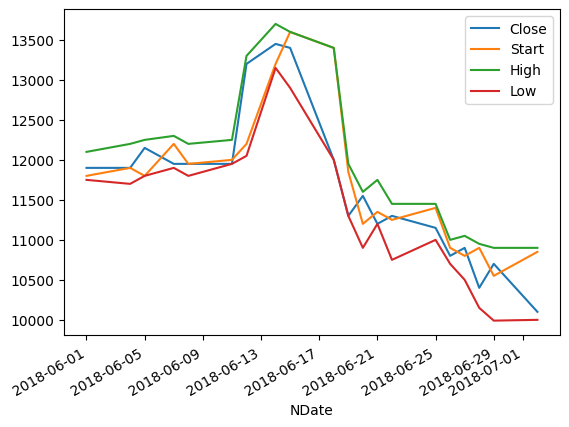

In [23]:
# 선 그래프
df1.plot()

##### Q1_0115. df1 Close 컬럼으로 다음을 수행하세요.
- NDate 별 막대그래프
- 6월만을 추출하여 Close 칼럼으로 일별 막대 그래프를 표현
- 히스토그램

<Axes: xlabel='NDate'>

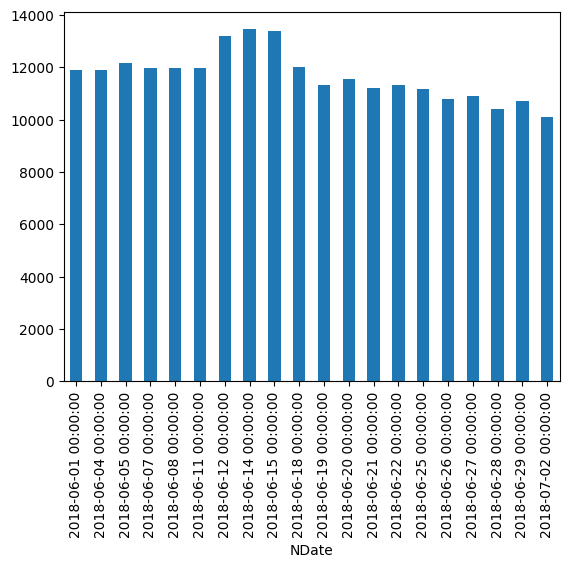

In [40]:
# NDate 별 막대그래프
df1.sort_values(by='NDate')['Close'].plot(kind='bar')

<Axes: xlabel='NDate'>

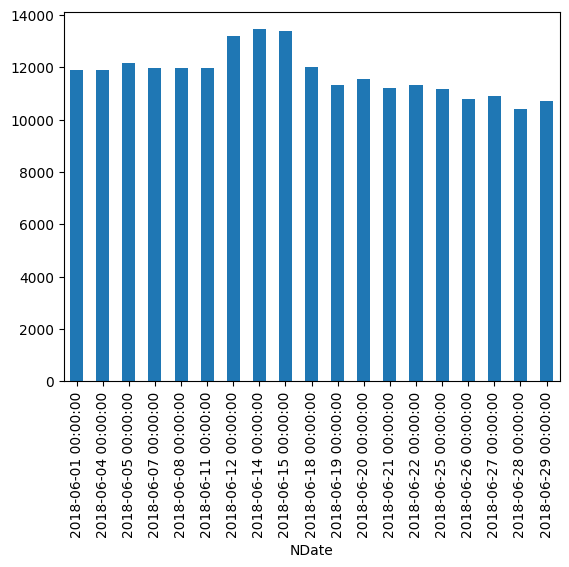

In [38]:
# 6월만을 추출하여 Close 칼럼으로 일별 막대 그래프를 표현
df2 = df1.sort_values(by='NDate').loc['2018-06-01':'2018-06-30']
df2['Close'].plot(kind='bar')

<Axes: ylabel='Frequency'>

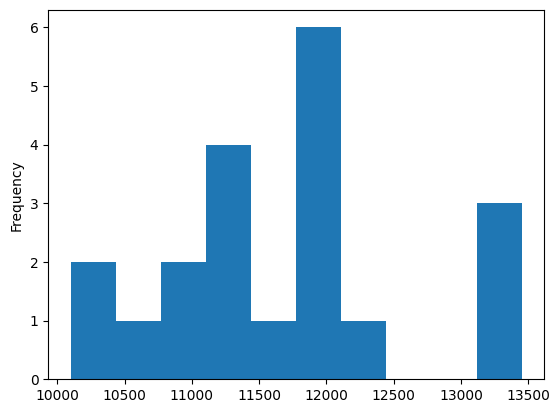

In [42]:
# 히스토그램
df1['Close'].plot(kind='hist')

##### Q2_0115. df에서 Volume 칼럼의 분포를 탐색하는 히스토그램을 표현하세요.

<Axes: ylabel='Frequency'>

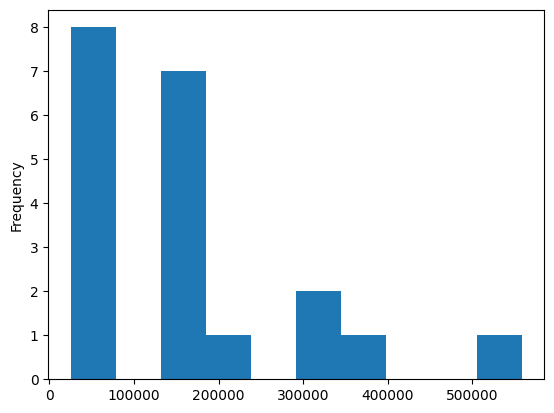

In [43]:
df['Volume'].plot(kind='hist')

##### Q3_0115. df Close 칼럼과 Volume 칼럼으로 산점도를 표현하세요.

<Axes: xlabel='Close', ylabel='Volume'>

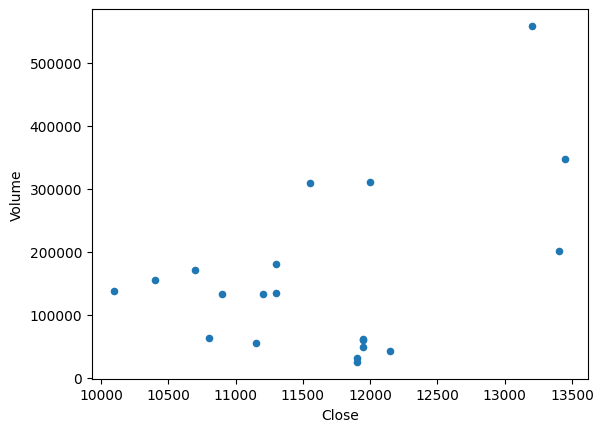

In [44]:
df.plot(x='Close', y='Volume', kind='scatter')

##### Q4_0115. df1 Close 칼럼의 Box Plot을 표현하세요.

<Axes: >

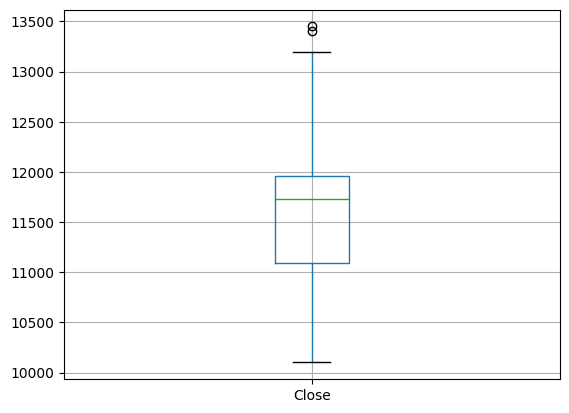

In [45]:
df1.boxplot(column=['Close'])